In [2]:
import pandas as pd
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt


# Loading Data
datasets=load_dataset('lukebarousse/data_jobs')
df=datasets['train'].to_pandas()


# Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list:ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [99]:
df_us=df[df['job_country']=='United States']

In [100]:
df_skills=df_us.explode('job_skills')
df_skills[['job_country','job_title','job_skills']]

,job_country,job_title,job_skills
0,United States,Senior Clinical Data Engineer / Principal Clin...,None
3,United States,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,United States,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,United States,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,United States,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...,...
785692,United States,Data Scientist- Hybrid Work Location,r
785703,United States,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,United States,Expert Business Data Analyst - Now Hiring,sql
785705,United States,Expert Business Data Analyst - Now Hiring,python


In [101]:
df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size().reset_index(name='skill_count').sort_values(by='skill_count',ascending=False)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [102]:
job_titles=df_skills_count['job_title_short'].unique().tolist()[:3]
job_titles.sort()
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

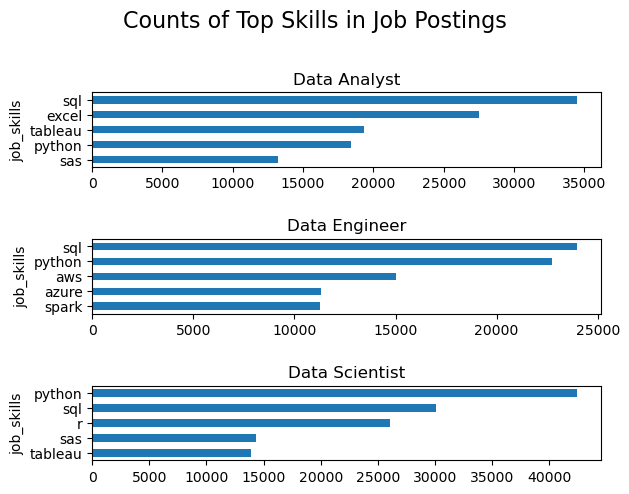

In [115]:
fig,ax=plt.subplots(len(job_titles),1)
for i,job_title in enumerate(job_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],legend=False,title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_xlabel('')
fig.suptitle('Counts of Top Skills in Job Postings',y=1.02,fontsize=16)
fig.tight_layout(h_pad=2)
plt.show()

In [118]:
df_job_title_count=df_us['job_title_short'].value_counts().reset_index(name='jobs_total')

In [139]:
df_skills_perc=pd.merge(df_skills_count,df_job_title_count,how='left',on='job_title_short')
df_skills_perc['skill_perc']=df_skills_perc['skill_count']/df_skills_perc['jobs_total'] *100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_perc
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


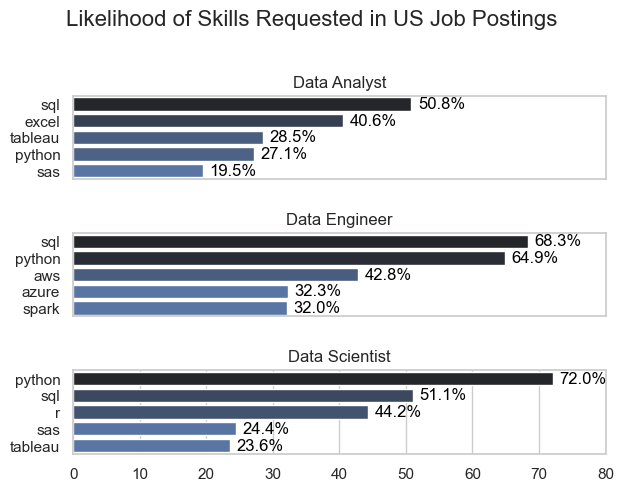

In [156]:
fig,ax=plt.subplots(len(job_titles),1)
sns.set_theme(style='whitegrid')
for i,job_title in enumerate(job_titles):
    df_plot=df_skills_perc[df_skills_perc['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plot,y='job_skills',x='skill_perc',ax=ax[i],hue='skill_count',palette='dark:b_r',legend=False)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,80)
    ax[i].set_title(job_title)
    for n,v in enumerate(df_plot['skill_perc']):
        ax[i].text(v+1,n,f'{v:.1f}%',color='black',va='center')
    if i!=len(job_titles)-1:    
        ax[i].set_xticks([])
fig.suptitle('Likelihood of Skills Requested in US Job Postings',y=1.02,fontsize=16)
fig.tight_layout(h_pad=2)
plt.show()

https://www.youtube.com/watch?v=wUSDVGivd-8
10h10m